# 8 | Demonstration: Video Processing
**ES143 Computer Vision, Harvard University**

This demonstrates how to:
* process a video, computing the minimum and maximum grayscale luminance values of each pixel over time

*Note: To run this demonstration notebook, copy it to your google drive, and copy the video file [input.mpg](https://canvas.harvard.edu/files/19790474/download?download_frd=1) into the same folder.*

---

# Setup

The next few cells mount your Google drive and unzip the required ZIP file. They also import some useful packages and configure figure sizes.

In [ ]:
# Mount your google drive. This will launch a pop-up window for authentication.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# EDIT THIS LINE SO THAT IF POINTS TO THE CORRECT FOLDER ON YOUR GOOGLE DRIVE

%cd "./"

In [ ]:
# Import any required libraries here
import cv2                               # OpenCV
import numpy as np                       # numpy

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters or use plt.figure(figsize=[H, W]) before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

# Compute minimum and maximum luminance values

The following code was written by ChatGPT in response to the following prompt:
> I have a video file `input.mpg` with spatial size HxW. In python, write me a function that considers the frames one at a time in sequential order, converting each to grayscale if necessary, and computing the minimum and maximum value of each pixel over time. The output of the function should be two HxW images that store the per-pixel minimum and maximum values.

In [ ]:
def compute_min_max_values(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the spatial dimensions of the video frames
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize arrays to store min and max values
    min_values = np.full((frame_height, frame_width), np.inf)
    max_values = np.full((frame_height, frame_width), -np.inf)

    # Read frames one by one
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Convert frame to grayscale if necessary
        if len(frame.shape) > 2:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        else:
            frame_gray = frame

        # Update min and max values
        min_values = np.minimum(min_values, frame_gray)
        max_values = np.maximum(max_values, frame_gray)

    # Release the video capture object
    cap.release()

    return min_values, max_values

# Example usage:
min_vals, max_vals = compute_min_max_values('input.mpg')

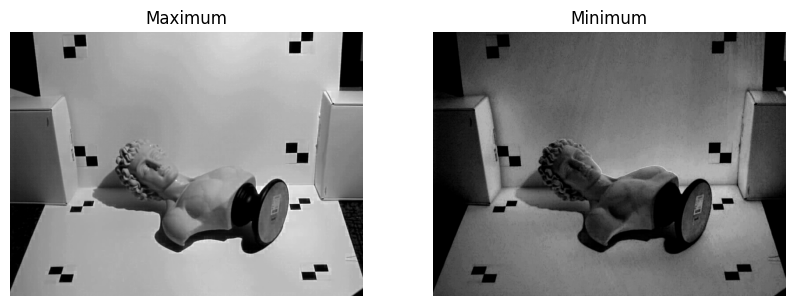

In [ ]:
#@title display the results

# Plot the images
plt.figure(figsize=(10, 5))

# Min values image
plt.subplot(1, 2, 1)
plt.imshow(max_vals, cmap='gray')
plt.title('Maximum')
plt.axis('off')

# Min values image
plt.subplot(1, 2, 2)
plt.imshow(min_vals, cmap='gray')
plt.title('Minimum')
plt.axis('off')

plt.show()


In [8]:
# Convert to HTML. Before running this cell:
# 1. edit your name in this cell
# 2. make sure your notebook executes and is saved

!jupyter nbconvert --to html Demo_VideoProcessing.ipynb  --output "Demo_VideoProcessing.html"

[NbConvertApp] Converting notebook Demo_VideoProcessing.ipynb to html
[NbConvertApp] Writing 770825 bytes to Demo_VideoProcessing.html
